In [176]:
from manim import *
import numpy as np
from scipy import stats

In [388]:
%%manim -qm Scene

class Scene(Scene):
    def comp1(self):
        text1 = Tex("Weighted posterior samples")
        text2 = MathTex(r"w_i, z_i, \vec h_i \sim p(z, \vec h| \vec x)")
        text1.next_to(text2, UP)
        vg = VGroup(text1, text2)
        vg.scale(0.9)
        return vg

    def comp2(self):
        text1 = Tex("Sampling")
        text2 = MathTex(r"z_i, \vec h_i \sim p(z, \vec h)")
        text3 = MathTex(r"w_i = p(\vec x_o |z, \vec h)")
        text2.next_to(text3, UP)
        text1.next_to(text2, UP)
        vg = VGroup(text1, text2, text3)
        vg.scale(0.9)
        return vg
    
    def like(self, z, h):
        z0 = np.sin(h*30)*0.15 + np.sin(h*40)*0.15 + 0.5
        return np.exp(-0.5*(z-z0)**2/0.05**2)
    
    def comp3(self, prior_samples, weights, log10_n):
        axes = Axes([0, 1, 0.1], [0, 1, 0.1], 4, 4)
        axes.scale(0.8)
        vg = VGroup(axes)
        points = [axes.c2p(*c) for c in prior_samples]
        rgbas = [
            [*(np.array([0, 1, 1])*weights[i]+np.array([1, 0, 0])), 1]
            for i in range(len(points))
        ]
        pm = PMobject(stroke_width=2).add_points(points = points, rgbas = rgbas)
        pm.add_updater(lambda z:
                       z.become(PMobject(stroke_width=2).add_points(points = points[:int(log10_n.get_value())], rgbas = rgbas[:int(log10_n.get_value())]))
                      )
        self.add(axes, pm)
        
    def comp5(self, prior_samples, weights, log10_n):
        axes = Axes([0, 1, 0.1], [0, 4, 0.4], 4, 4)
        axes.shift(DOWN*1.5, RIGHT*4)
        x = np.linspace(0.01, 0.99, 50)
        
        h, _ = np.histogram(prior_samples[:,0], bins = 50, range=[0, 1], weights = weights, density = True)
        graph = axes.get_line_graph(x, h)    

        def update(self):
            nn = int(log10_n.get_value())
            h, _ = np.histogram(prior_samples[:nn,0], bins = 50, range=[0, 1], weights = weights[:nn], density = True)
            h /= max(1, 0.25*h.max())
            graph = axes.get_line_graph(x, h)
            self.become(graph)
            
        graph.add_updater(update)

        self.add(axes)
        self.add(graph)
        
    def construct(self):
        self.add(Title("Likelihood-based inference"))
        
        comp1 = self.comp1()
        comp1.shift(UP*1.5, LEFT*4.)
        self.add(comp1)
        
        comp2 = self.comp2()
        comp2.shift(DOWN*2, LEFT*4.5)
        self.add(comp2)
        
        N = 40000
        prior_samples = np.random.rand(N, 2)
        weights = np.array([self.like(*prior_samples[i]) for i in range(N)])
        
        log10_n = ValueTracker(100)
        
        self.comp3(prior_samples, weights, log10_n)
        self.comp5(prior_samples, weights, log10_n)
        self.play(log10_n.animate.set_value(40000), run_time = 7)
        
        mask = np.random.rand(N)<weights
        prior_samples = prior_samples[mask]
        weights = np.ones(sum(mask))
        

[07/20/21 09:07:51] INFO     Animation 0 : Partial movie file        ]8;id=1626764871.3095577-41019;file:///home/cweniger/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in '/home/cweniger/work/codes/s                         
                             wyft/notebooks/media/videos/notebooks/7                         
                             20p30/partial_movie_files/Scene/1342159                         
                             004_468128474_2591158570.mp4'

                    INFO                                             ]8;id=1626764871.551599-773742;file:///home/cweniger/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:597
                             File ready at '/home/cweniger/work/code                         
                             s/swyft/notebooks/media/videos/notebook                         
                             s/720p30/Scene.mp4'

                    INFO     Rendered Scene                                      ]8;id=1626764871.5565002-980485;file:///home/cweniger/.local/lib/python3.8/site-packages/manim/scene/scene.py\scene.py]8;;\:228
                             Played 1 animations

In [370]:
%%manim -qh Scene

class Scene(Scene):
    def construct(self):
        self.add(Title("Likelihood-based inference"))
        tex_joint = MathTex(r"p(z, \vec h| \vec x_o)")
        tex_joint.shift(UP*2+LEFT*5)
        tex_marg = MathTex(r"p(z| \vec x_o)").shift(UP*2+LEFT)
        arrow = Arrow(tex_joint.get_critical_point(RIGHT), tex_marg.get_critical_point(LEFT), stroke_width=3, tip_length = 0.2)
        
        line = ""
        for i in range(1, 6):
            line += r"p(h_%i| \vec x_o),\;"%i
        line += "..."
        tex1 = MathTex(line).scale(0.9).align_to(tex_joint, LEFT)
        arrows = [Arrow(tex_joint.get_critical_point(DOWN) + s*LEFT*0.1, tex1.get_critical_point(UP)+LEFT*s, stroke_width=3, tip_length = 0.2) for s in [4, 2, 0, -2, -4]]
        
        lineZ = ""
        for i in range(1, 6):
            lineZ += r"p(z, h_%i| \vec x_o),\;"%i
        lineZ += "..."
        tex2 = MathTex(lineZ).scale(0.8).align_to(tex_joint, LEFT).shift(DOWN*0.8)
        
        lineH = ""
        lineH += r"p(h_1, h_2| \vec x_o),\;"
        lineH += r"p(h_1, h_3| \vec x_o),\;"
        lineH += r"p(h_2, h_3| \vec x_o),\;"
        lineH += r"p(h_1, h_4| \vec x_o),\;"
        lineH += r"p(h_2, h_4| \vec x_o),\;"
        lineH += "..."
        tex3 = MathTex(lineH).scale(0.7).align_to(tex_joint, LEFT).shift(1.5*DOWN)
        
        lineHH = ""
        lineHH += r"p(z, h_1, h_2| \vec x_o),\;"
        lineHH += r"p(z, h_1, h_3| \vec x_o),\;"
        lineHH += r"p(z, h_2, h_3| \vec x_o),\;"
        lineHH += r"p(z, h_1, h_4| \vec x_o),\;"
        lineHH += r"p(z, h_2, h_4| \vec x_o),\;"
        lineHH += "..."
        tex4 = MathTex(lineHH).scale(0.6).align_to(tex_joint, LEFT).shift(2.1*DOWN)
        
        tex5 = MathTex(r"...").scale(0.5).align_to(tex_joint, LEFT).shift(2.6*DOWN)
        
        texall = Tex("To solve ONE inference problem, we had to solve ALL of them.").shift(3.5*DOWN)

        self.play(Write(tex_joint))
        self.play(Create(arrow), Write(tex_marg))
        self.wait(1)
        self.play(*[Create(a) for a in arrows], Write(tex1))
        self.wait(1)
        self.play(Write(tex2), run_time = 0.8)
        self.play(Write(tex3), run_time = 0.6)
        self.play(Write(tex4), run_time = 0.4)
        self.play(Write(tex5), run_time = 0.2)
        self.wait(1)
        self.play(Write(texall))
        self.wait(1)

[07/20/21 08:53:28] INFO     Writing "To solve ONE inference problem,  ]8;id=1626764008.8520756-705185;file:///home/cweniger/.local/lib/python3.8/site-packages/manim/utils/tex_file_writing.py\tex_file_writing.py]8;;\:83
                             we had to solve ALL of them." to                                
                             media/Tex/ac2bae6248bc5b41.tex

[07/20/21 08:53:30] INFO     Animation 0 : Using cached data (hash :    ]8;id=1626764010.1275852-155387;file:///home/cweniger/.local/lib/python3.8/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:100
                             450974505_3582815898_4201048355)

[07/20/21 08:53:32] INFO     Animation 1 : Partial movie file        ]8;id=1626764012.4567947-636925;file:///home/cweniger/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in '/home/cweniger/work/codes/s                         
                             wyft/notebooks/media/videos/notebooks/1                         
                             080p60/partial_movie_files/Scene/396807                         
                             2068_1131223921_2379299169.mp4'

                    INFO     Animation 2 : Using cached data (hash :    ]8;id=1626764012.6747093-777369;file:///home/cweniger/.local/lib/python3.8/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:100
                             3968072068_3204573912_2611692419)

[07/20/21 08:53:33] INFO     Animation 3 : Using cached data (hash :    ]8;id=1626764013.2179785-112279;file:///home/cweniger/.local/lib/python3.8/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:100
                             3968072068_3884718833_3458718147)

                    INFO     Animation 4 : Using cached data (hash :    ]8;id=1626764013.649672-491496;file:///home/cweniger/.local/lib/python3.8/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:100
                             3968072068_3204573912_3854297493)

[07/20/21 08:53:34] INFO     Animation 5 : Using cached data (hash :    ]8;id=1626764014.671768-509843;file:///home/cweniger/.local/lib/python3.8/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:100
                             3968072068_2115214976_728740318)

[07/20/21 08:53:35] INFO     Animation 6 : Using cached data (hash :    ]8;id=1626764015.7758858-358443;file:///home/cweniger/.local/lib/python3.8/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:100
                             3968072068_1280432464_1905045043)

[07/20/21 08:53:37] INFO     Animation 7 : Using cached data (hash :    ]8;id=1626764017.2012691-687758;file:///home/cweniger/.local/lib/python3.8/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:100
                             3968072068_2325926150_986895412)

[07/20/21 08:53:38] INFO     Animation 8 : Using cached data (hash :    ]8;id=1626764018.395097-320874;file:///home/cweniger/.local/lib/python3.8/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:100
                             3968072068_846867977_564543377)

[07/20/21 08:53:39] INFO     Animation 9 : Using cached data (hash :    ]8;id=1626764019.5212314-126609;file:///home/cweniger/.local/lib/python3.8/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:100
                             3968072068_3204573912_708846545)

[07/20/21 08:53:46] INFO     Animation 10 : Partial movie file       ]8;id=1626764026.2538104-843924;file:///home/cweniger/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in '/home/cweniger/work/codes/s                         
                             wyft/notebooks/media/videos/notebooks/1                         
                             080p60/partial_movie_files/Scene/396807                         
                             2068_3638185704_3486410590.mp4'

[07/20/21 08:53:49] INFO     Animation 11 : Partial movie file       ]8;id=1626764029.3622549-137500;file:///home/cweniger/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:413
                             written in '/home/cweniger/work/codes/s                         
                             wyft/notebooks/media/videos/notebooks/1                         
                             080p60/partial_movie_files/Scene/396807                         
                             2068_3204573912_455965401.mp4'

                    INFO                                             ]8;id=1626764029.6554105-902335;file:///home/cweniger/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:597
                             File ready at '/home/cweniger/work/code                         
                             s/swyft/notebooks/media/videos/notebook                         
                             s/1080p60/Scene.mp4'

                    INFO     Rendered Scene                                      ]8;id=1626764029.660294-851980;file:///home/cweniger/.local/lib/python3.8/site-packages/manim/scene/scene.py\scene.py]8;;\:228
                             Played 12 animations

[07/20/21 09:05:31] INFO                                             ]8;id=1626764731.5984056-864167;file:///home/cweniger/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:597
                             File ready at '/home/cweniger/work/code                         
                             s/swyft/notebooks/media/images/notebook                         
                             s/Scene_ManimCE_v0.8.0.png'

                    INFO     Rendered Scene                                      ]8;id=1626764731.6020794-200534;file:///home/cweniger/.local/lib/python3.8/site-packages/manim/scene/scene.py\scene.py]8;;\:228
                             Played 0 animations

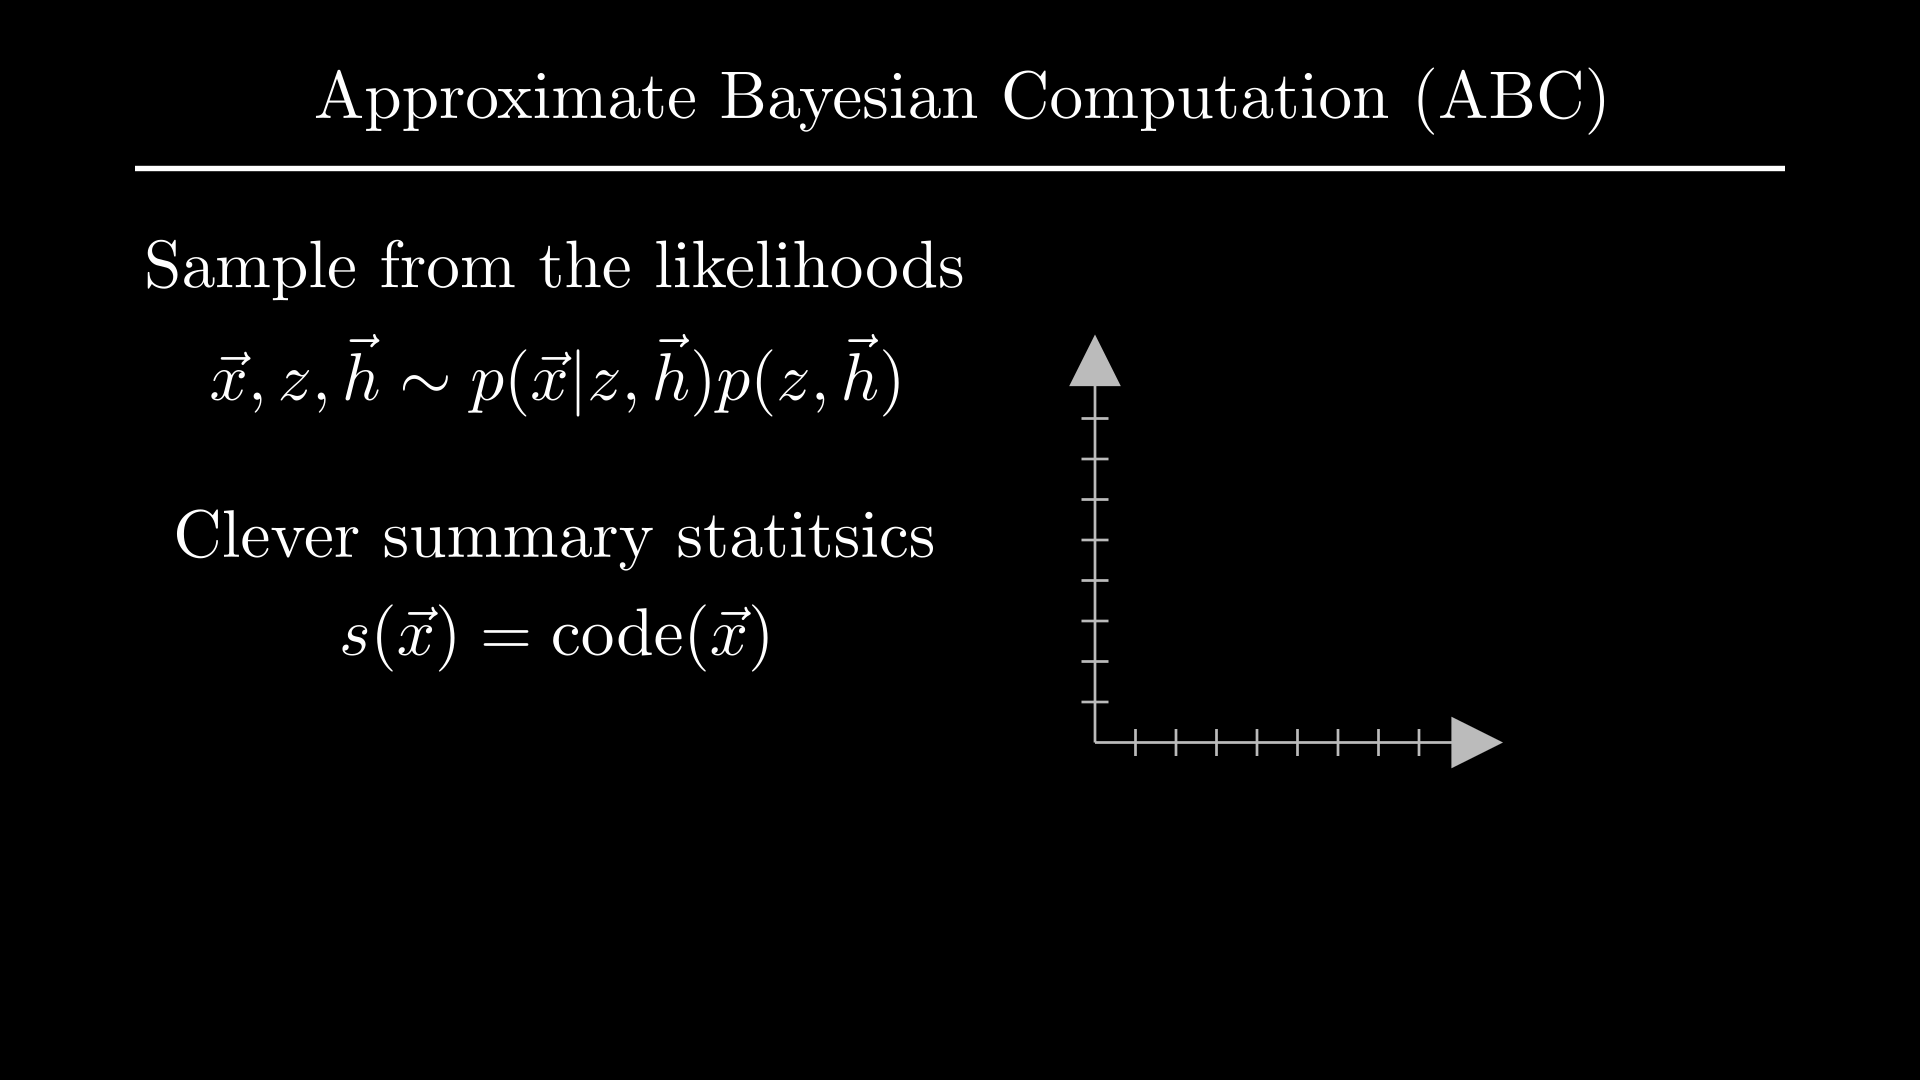

In [387]:
%%manim -qh Scene

class Scene(Scene):
    def construct(self):
        tHow = Tex("Sample from the likelihoods").shift(LEFT*3, UP*2)
        tSample = MathTex(r"\vec x, z, \vec h \sim p(\vec x| z, \vec h) p(z, \vec h)")
        tSample.next_to(tHow, DOWN)
        tClever = Tex(r"Clever summary statitsics").shift(LEFT*3)
        tSummary = MathTex(r"s(\vec x) = \text{code}(\vec x)").next_to(tClever, DOWN)
        axes = Axes([0, 1, 0.1], [0, 1, 0.1], 3, 3, ).shift(RIGHT*2.5)
        
        
        self.add(Title("Approximate Bayesian Computation (ABC)"))
        self.add(tSample, tHow, tClever, tSummary)
        self.add(axes)
        
        

In [ ]:
%%manim -ql -s Scene

class Scene(Scene):
    def construct(self):
        like = MathTex(r"p(x_o|z)")
        liket = Tex("Likelihood").shift(DOWN)
        vg = VGroup(like, liket)
        post = MathTex(r"p(z)")
        postt = Tex("Posterior").shift(DOWN)
        vg2 = VGroup(post, postt)
        axes = Axes([0, 10, 1], [0, 0.5, .1], 4, 4, axis_config = dict(unit_size = 0.5, include_numbers = True))
        axes.shift(4*LEFT, DOWN)
        m = ValueTracker(3.)
        graph = axes.get_graph(lambda x: stats.norm.pdf(x, m.get_value(), 1.), color=BLUE)
        t = MathTex("z = %.2f"%m.get_value()).shift(4*LEFT, UP)
        t.add_updater(lambda z: z.become(MathTex("z = %.2f"%m.get_value()).shift(4*LEFT, UP)))
        graph.add_updater(lambda z: z.become(axes.get_graph(lambda x: stats.norm.pdf(x, m.get_value(), 1.), color=BLUE)))

        self.play(Write(like))
        self.play(Write(liket))
        self.play(vg.animate.shift(4*LEFT, 3*UP))
        self.wait(1)
        self.play(Create(axes))
        self.play(Create(graph))
        self.play(Write(t))
        self.wait(1)
        self.play(m.animate.set_value(6.), run_time = 2)
        self.play(m.animate.set_value(3.), run_time = 2)
        self.wait(1)
        self.play(Write(post))
        self.play(Write(postt))
        self.wait(1)
        self.play(vg2.animate.shift(4*RIGHT, 3*UP))
        self.wait(1)

In [ ]:
%%manim -ql Scene2

class Scene2(Scene):
    def construct(self):
        like = MathTex(r"p(x_o|z)")
        liket = Tex("Likelihood").shift(DOWN)
        vg = VGroup(like, liket)
        axes = Axes([0, 10, 1], [0, 0.5, .1], 4, 4, axis_config = dict(unit_size = 0.5, include_numbers = True))
        axes.shift(4*LEFT, DOWN)
        m = ValueTracker(3.)
        graph = axes.get_graph(lambda x: stats.norm.pdf(x, m.get_value(), 1.), color=BLUE)
        t = MathTex("z = %.2f"%m.get_value()).shift(4*LEFT, UP)
        t.add_updater(lambda z: z.become(MathTex("z = %.2f"%m.get_value()).shift(4*LEFT, UP)))
        graph.add_updater(lambda z: z.become(axes.get_graph(lambda x: stats.norm.pdf(x, m.get_value(), 1.), color=BLUE)))

        self.play(Write(like), Write(liket))
        self.play(Create(axes), Create(graph), Write(t))
        self.play(m.animate.set_value(6.), run_time = 2)
        self.play(m.animate.set_value(3.), run_time = 2)

In [ ]:
%%manim -ql ThreeDSurfacePlot

class ThreeDSurfacePlot(ThreeDScene):
    def construct(self):
        resolution_fa = 42
        #self.set_camera_orientation(phi=100*DEGREES, theta=-90*DEGREES, gamma = 0*DEGREES)
        
        prior = lambda z: stats.norm.pdf(z, 0, 5.)
        like = lambda x, z: stats.norm.pdf(x, z, 1.)
        
        axes = ThreeDAxes([0, 4, 1], [0, 4, .5], [0, 4, .1], 5, 5, 5)


        def param_gauss(u, v):
            x = u
            z = v
            h = prior(z)*like(x, z)*20
            return axes.c2p(u, h, v)

        gauss_plane = ParametricSurface(
            param_gauss,
            resolution=(resolution_fa, resolution_fa),
            v_min=0,
            v_max=4,
            u_min=0,
            u_max=4, 
            fill_opacity = 0.5,
        )

        #sphere = ParametricSurface(
        #    lambda u, v: axes.c2p(
        #        1.5 * np.cos(u) * np.cos(v),
        #        1.5 * np.cos(u) * np.sin(v),
        #        1.5 * np.sin(u)
        #    ), v_min=0, v_max=TAU, u_min=-PI / 2, u_max=PI / 2,
        #    checkerboard_colors=[RED_D, RED_E], resolution=(15, 32)
        #)

        #gauss_plane.scale_about_point(1, ORIGIN)
        #gauss_plane.set_style(fill_opacity=1,stroke_color=GREEN)
        #gauss_plane.set_fill_by_checkerboard(ORANGE, BLUE, opacity=0.5)
        #graph = axes.get_graph(lambda x: stats.norm.pdf(x, 1., 1.), color=BLUE)
        #graph = axes.get_line_graph([0, 1], [0, 1], [0, 1])
        #g2 = axes.get_vertical_lines_to_graph(graph)
        #graph.shift(FRONT)

        self.add(axes)
        self.add(gauss_plane)
        #self.add(graph)
        #self.add(sphere)
        self.begin_ambient_camera_rotation(rate=2)
        self.wait(PI/2)
        self.stop_ambient_camera_rotation()

[07/18/21 19:51:12] INFO                                             ]8;id=1626630672.6034265-924799;file:///home/cweniger/.local/lib/python3.8/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:597
                             File ready at '/home/cweniger/work/code                         
                             s/swyft/notebooks/media/images/notebook                         
                             s/ThreeDSurfacePlot_ManimCE_v0.8.0.png'

                    INFO     Rendered ThreeDSurfacePlot                          ]8;id=1626630672.6063964-663687;file:///home/cweniger/.local/lib/python3.8/site-packages/manim/scene/scene.py\scene.py]8;;\:228
                             Played 5 animations

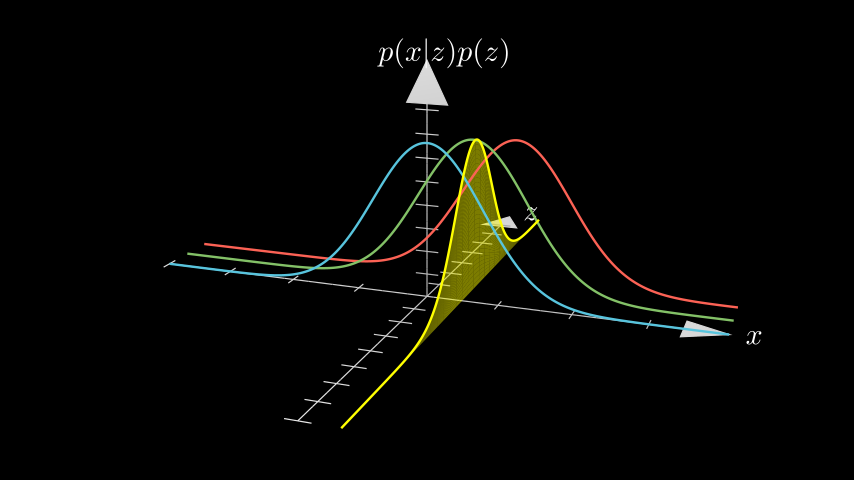

In [243]:
%%manim -ql -s ThreeDSurfacePlot

class ThreeDSurfacePlot(ThreeDScene):
    def prior(self, z):
        return stats.norm.pdf(z, 0., 3.)
    
    def like(self, x, z):
        return stats.norm.pdf(x, z, 0.8)
    
    def func(self, z, x, t=1):
        return [z, x, self.prior(z)*self.like(x, z)*t]
    
    def construct(self):
        resolution_fa = 42
        self.set_camera_orientation(phi=75*DEGREES, theta=30*DEGREES, gamma = 0*DEGREES)
        axes = ThreeDAxes([-4, 4, 1], [-4, 4, .5], [0, 0.1, .01], 5, 5, 2).scale(2)
        
        curve = axes.get_parametric_curve(lambda z: self.func(z, 0.5), t_range = [-4, 4], shade_in_3d = False, color=GREEN)
        curve2 = axes.get_parametric_curve(lambda z: self.func(z, 1.0), t_range = [-4, 4], shade_in_3d = False, color=RED)
        curve3 = axes.get_parametric_curve(lambda z: self.func(z, 0.0), t_range = [-4, 4], shade_in_3d = False, color=BLUE)
        curve4 = axes.get_parametric_curve(lambda z: self.func(0.5, z), t_range = [-4, 4], shade_in_3d = False, color=YELLOW)
        surface = ParametricSurface(lambda u, v: axes.c2p(*self.func(0.5, u, t=v)), -4, 4, 0, 1, fill_opacity = 0.5,
                                    checkerboard_colors = None, stroke_color=None, fill_color=YELLOW, stroke_width=0.)
        
        labelx = MathTex(r"x").next_to(axes.c2p(4, 0, 0), RIGHT)
        labelz = MathTex(r"z").next_to(axes.c2p(0, 4, 0), UP+RIGHT)
        labelp = MathTex(r"p(x|z)p(z)").next_to(axes.c2p(0, 0, 0.1), UP*2)
        self.add_fixed_orientation_mobjects(labelx, labelz, labelp)
                                
        self.add(axes)
        #self.add(surface)
        self.add(labelx, labelz, labelp)
        
        self.begin_3dillusion_camera_rotation(rate=1.5)
        self.play(Create(curve2))
        self.play(Create(curve))
        self.play(Create(curve3))
        self.play(Create(curve4), Create(surface))
        self.wait(3)
        self.stop_3dillusion_camera_rotation()